# Data wrangling

Data can be:
- 1D vectors (temperature, audio)
- 2D matrices (grayscale images)
- 3D tensors (colour images, video)
- Text `-> Vector Space Model -> 1D vectors`

## All data -> Vectors in the end

##### Example: polynomial prediction = (PS1) inner product of vectors:

$$
h_{\theta}(x) = \sum_{j} \theta_j x^j =  \sum_{j} \theta_j v_j = \langle \theta, v \rangle
$$

##### what if x or v are matrices? - `reshape` to vectors!

In [9]:
import numpy as np

V = np.array([[1,2,3], [4,5,6]])
theta = np.ones(6)
v = np.reshape(V, -1)
# np.dot(theta, v)
V2 = np.reshape(v, (3,2))
V2

array([[1, 2],
       [3, 4],
       [5, 6]])

**Observation:** Python stores matrices row by row

## 1D Vectors from time series data

- **domain points** are **time points**:

$$
x_i = t_i \quad 0 = t_1 < t_2 < ... < t_m
$$

- **labels** are **noisy** values of a continuous function:

$$
y_i = f(x_i) + \xi_i
$$

where:
- $f(t): [0,\infty) \rightarrow \mathbb{R}$
- $\xi_i$ is a realisation of a RV $\Xi \sim \mathbb{P}$
  - usually $\mathbb{E}[\Xi] = 0$

#### Goal: find $h_{\theta}(t) \approx f(t)$ 

### Problem: $\#$ data for `oscillating` $f(t)$ such as `audio`

- Example: $f(t) = \sin(2\pi \nu t)$ with _frequency_ $\nu=1000$

$$
f(0) =  0 = f(0.001)
$$

but $f$ varies between 0 and 0.001.

### Shannon theorem: $t_{i+1}-t_i$ should be $< 1/2$ period of $f$
- in this case 0.0005
- 2000 points for 1 second of audio

#### Solution: data compression in
- storage (audio formats)
- learning (feature design: e.g. compute $V$ from trig functions instead of monomials)

In [14]:
from scipy.io import wavfile

nu, y = wavfile.read('1.wav')
y[::4].shape # subsampling

(330750, 2)

In [17]:
import IPython.display as ipd
ipd.Audio(y.T, rate=2*nu)

# Images

In [21]:
from matplotlib import pyplot as plt
X = plt.imread('Royal-Crescent.jpg')
X.shape

(1707, 2560, 3)

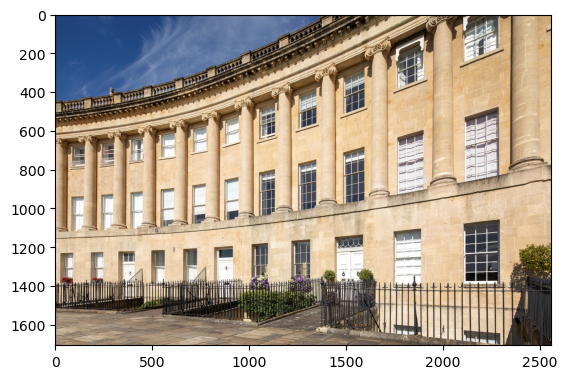

In [23]:
plt.imshow(X)

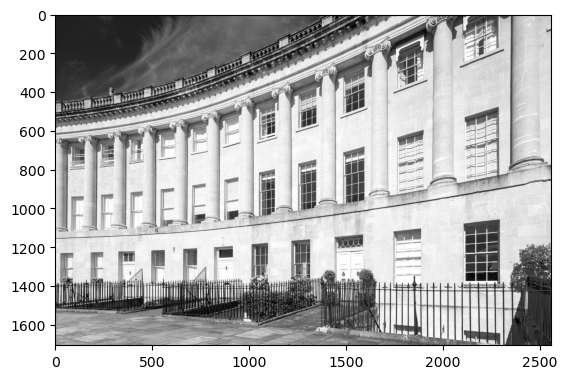

In [28]:
plt.imshow(X[:,:,0], cmap='gray')

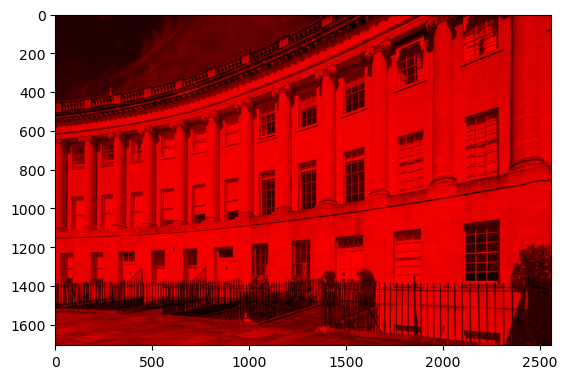

In [30]:
plt.imshow(X * np.array([1,0,0]))

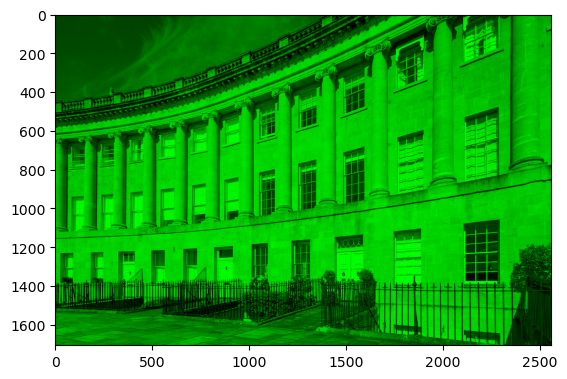

In [32]:
plt.imshow(X * np.array([0,1,0]))

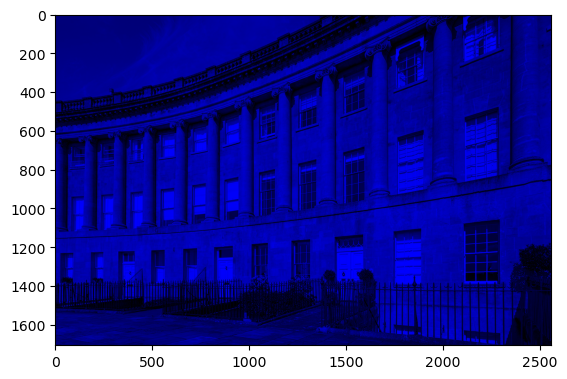

In [34]:
plt.imshow(X * np.array([0,0,1]))

**Observation**: colour intensities are stored along 3d dimension in an image

# Text data: information retrieval

- **Def 2.1**: __Boolean retrieval__ produces a binary answer to each document in a text dataset
  - E.g. does the document contain a query
- __Scoring__: which document is __most relevant__ to a query
- __Clustering__: which documents are similar
- __Classification__: what is the topic of a document

## Text data -> vector

**Def 2.3**: __Term__ is the smallest unit of text (words, numbers, abbrev.)

**Def 2.4**: __Document__ is a block of terms. <br>
__Query__ is a block of terms which are a **subset** of document terms.

### Idea of Info Retrieval: **index** all possible terms in advance, and refer to their **numbers**

- Example: "a" -> 1, "at" -> 2, ..., "zoo" -> $n$

**Def 2.5**: Let dataset contain $n$ terms. The __Vector Space Model__ associates each document or query to a __term-to-document__ vector:

$$
q = (q_1,...,q_n): \quad q_j = \begin{cases} \neq 0 & \text{if the document contains $j$th term}, \\ 0 & \text{otherwise.} \end{cases}
$$